##### Joshua Boehm
##### 31 August, 2022
##### Math 3423

# Libraries

In [8]:
import pprint
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy import array
from scipy.linalg import hilbert
from scipy.linalg import lu
from scipy.linalg import solve
from scipy.linalg import ldl
from scipy.linalg import det

**Function to fill m x n matrices**

In [9]:
def matrix_creator(ROW, COL):
    
    ROW = int(ROW)
    COL = int(COL)
    rownumber = 1
    entries = []
    
    print('\n')
    print("-"*70)
    print("-"*70)
    print(f"Confirming matrix size {ROW} x {COL}.")
    print("Enter the entries, row by row, pressing return after each entry: ")
    
    # User input of entries in a 
    # single line separated by space
    for r in range(ROW):
        entries.append([int(input(f"Enter value {x+1} in Row {rownumber}:  ")) for x in range(COL)])
        rownumber+=1
    
    
    
    # For printing the matrix
    matrix = np.array(entries).reshape(ROW, COL)
    print(f"The matrix entered is as follows: \n {matrix}")
    print("-"*70)
    print("-"*70)
    print('\n')
    return(matrix)

# Problem Set 2.1 

## Question 15

A well-known example of an ill-conditioned matrix is the Hilbert matrix:

$$A = \begin{bmatrix}
1 & \frac1 2 & \frac 1 3 & \cdots\\
\frac 1 2 & \frac 1 3 & \frac 1 4 & \cdots\\
\frac 1 3 & \frac 1 4 & \frac 1 5 & \cdots\\
\vdots & \vdots & \vdots & \ddots
\end{bmatrix}$$

Write a program that specializes in solving the equations $Ax = b$ by Doolittle’s decomposition method, where $A$ is the Hilbert matrix of arbitrary size $n \times n$, and

$$
b_i = \sum_{j=1}^{n} = A_{ij}
$$

The program should have no input apart from $n$. By running the program, determine the largest $n$ for which the solution is within six significant figures of the exact solution 


$$
x =
\begin{bmatrix}1 & 1 & 1 & \cdots
\end{bmatrix}^{T}
$$

### Answer
We will utilize the numpy library, as below (question 18), but hide the outputs. As $n$ grows higher, it becomes more annoying to see. If you want to, you can uncomment the lines that print the matrices.<br><br>

In [10]:
def hilbert_test(n):
    
    # Assigns A and b to a hilbert matrix of size nxn and to an nx1 matrix respectively.
    A = hilbert(n)
    #b = np.ones((n,1))
    b = A.sum(axis=1, keepdims = True)
    
    # Utilies the scipy library to formulate P, L, and U from A.
    P, L, U = sp.linalg.lu(A)

#     print ("A:")
#     pprint.pprint(A)

#     print ("P:")
#     pprint.pprint(P)

#     print ("L:")
#     pprint.pprint(L)

#     print ("U:")
#     pprint.pprint(U)
    
#     print ("b:")
#     pprint.pprint(b)
    
    #print ("Lb=y, solve for y:")
    y = solve(L, P.T @ b)
    #pprint.pprint(y)
    
    #print("Uy = x: solve for x")
    x = solve(U, y)
    #pprint.pprint(x)
           
    print("LU Solve x:")
    solvex = solve(A, b)
    pprint.pprint(solvex)
    
    realsolution = np.ones((n,1))
    
#     print ("Reconstruction:")
#     reconstruction = (P @ L @ U @ x)
#     pprint.pprint(reconstruction)
    
    if np.allclose(x, realsolution, atol = 0,rtol = 1e-07):
        print("TEST PASS")
    else:
        print("TEST FAIL")
    

In [11]:
hilbert_test(8)

LU Solve x:
array([[1.        ],
       [1.        ],
       [0.99999998],
       [1.00000013],
       [0.99999966],
       [1.00000048],
       [0.99999966],
       [1.0000001 ]])
TEST FAIL


When the relative tolerance used to check the matrix is set to  $1\cdot10^{-7}$, it starts to diverge at $n=7$. It fails at $n=8$. To be honest, I was expecting the $n$ value to be higher before it failed with this sensativity.

If I did this terribly wrong, let me know please.
<br><br>

## Question 18

Determine the fourth-degree polynomial $y(x)$ that passes through the points $(0, −1), (1, 1), (3, 3), (5, 2)$, and $(6, −2)$.

### Answer

The system of equations derived from this information follows this formula:

$$y = a_0 + a_1x + a_2x^2...+ a_nx^n$$


When the data in the question is applied, we get the following.

\begin{align*}
a_0& + a_1(0) + a_2(0) + a_3(0) + a_4(0) &= -1&\\
a_0& + a_1(1) + a_2(1) + a_3(1) + a_4(1) &= 1&\\
a_0& + a_1(3) + a_2(9) + a_3(27) + a_4(81) &= 3&\\
a_0& + a_1(5) + a_2(25) + a_3(125) + a_4(625)  &= 2&\\
a_0& + a_1(6) + a_2(36) + a_3(216) + a_4(1296) &= -2&
\end{align*}


In matrix form we end up with:
$$
\begin{bmatrix} 
1 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 1 \\
1 & 3 & 9 & 27 & 81 \\
1 & 5 & 25 & 125 & 625 \\
1 & 6 & 36 & 216 & 1296
\end{bmatrix}
\begin{bmatrix}
a_0\\a_1\\a_2\\a_3\\a_4\end{bmatrix}=\begin{bmatrix} -1\\1\\3\\2\\-2 \end{bmatrix}$$



<br><br>
At this point, we can perform PLU factorization as shown in the code block below.
As mentioned above, I wrote a code to input these numbers (mostly to practice Python again) so that the formula can be reused more easily in the future. It should be commented out, but if you're interested in seeing it work, feel free to remove them. <br><br>

In [12]:
# row = input("How many rows/columns?: ")
# A = matrix_creator(row,row) # It can only be square

# A = array([
#   [1, 0, 0, 0, 0],
#   [1, 1, 1, 1, 1],
#   [1, 3, 9, 27, 81],
#   [1, 5, 25, 125, 625],
#   [1, 6, 36, 216, 1296]], float)
matrix = []
for i in [0,1,3,5,6]:
    matrix.append(1)
    matrix.append(i)
    matrix.append(i**2)
    matrix.append(i**3)
    matrix.append(i**4)
A= np.array(matrix).reshape((5,5)).astype(float)
print("Original (m x n) Matrix A")
pprint.pprint(A)
#
# PLU Factorization of A
P, L, U = lu(A)
#
print(" ")
print("Permutation (m x m) Matrix P ")
print(P)
print(" ")
print("Lower Triangular (m x m) Matrix L")
print(L)
print(" ")
print("Upper Triangular (m x n) Matrix U")
print(U)
print(" ")
print("---> Reconstruct A")
print(P @ L @ U)
#
# Solve A x = b
print('\n')

print("The (m x 1) Vector b")
#b = matrix_creator(row, 1)
b = array([ -1, 1, 3, 2, -2])
print(b)
print("\n")
#
print(" ---> Solve A x = P L U x = b Using the PLU-Factorization")
print(" ---> Since A = P L U we have L U x = P^t b ")
print(" ")
print(" ---> 1st: Solve L y = P^t b --> For the (m x 1) Vector y ")
y = solve(L, P.T @ b)
print(y)
#
print(" ")
print(" ---> 2nd: Solve U x = y --> x ")
x = solve(U, y)
print(" ---> The (n x 1) Solution Vector x from PLU:")
print(x)
x = solve(A, b)
print(" ")
print(" ---> The (n x 1) Solution Vector x from solve:")
print(x)
print(" ")
print(" ---> Reconstruct the (m x 1) Vector P L U x --> b ")
print(P @ L @ U @ x)
print(" ")

asub = x

Original (m x n) Matrix A
array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03]])
 
Permutation (m x m) Matrix P 
[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]]
 
Lower Triangular (m x m) Matrix L
[[ 1.          0.          0.          0.          0.        ]
 [ 1.          1.          0.          0.          0.        ]
 [ 1.          0.5         1.          0.          0.        ]
 [ 1.          0.83333333  0.55555556  1.          0.        ]
 [ 1.          0.16666667  0.55555556 -1.          1.        ]]
 
Upper Triangular (m x n) Matrix U
[[ 1.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  6.000e+00  3.600e+01  2.160e+02  1.296e+03]
 [ 0.000e+00  0.000e+00 -9

The solution vector is:

$$\begin{bmatrix}-1\\2.68\overline{3}\\-0.875\\0.21\overline{6}\\-.025
\end{bmatrix}$$

In [13]:
print(x)

[-1.          2.68333333 -0.875       0.21666667 -0.025     ]


### Graphical Representation

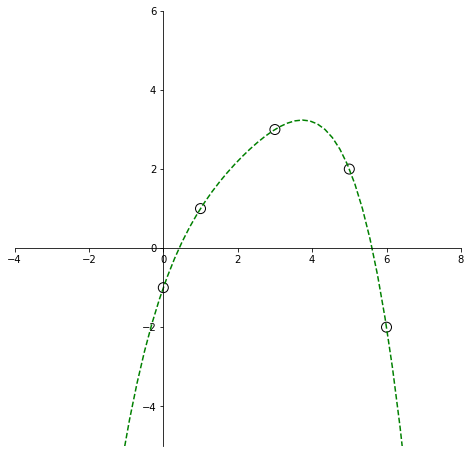

In [14]:
# A plot to show this graphically

# Create the vectors for the line and the points
x = np.linspace(-10, 10, 100)
y = asub[0] + asub[1]*x + asub[2]*x**2 + asub[3]*x**3 + asub[4]*x**4
X1 = np.array([0,1,3,5,6])
Y1 = np.array([-1,1,3,2,-2])

# Setting up the plot itself
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.ylim(-5,6)
plt.xlim(-4,8)

# Plotting the functions
plt.plot(x,y, 'g--')
plt.scatter(X1,Y1, edgecolor='k',c='none',s=100)

# Showing the plot
plt.show()

## Question 21

Compute the condition number of the matrix 

$$A=\begin{bmatrix}
1 & -1 & -1\\
0 & 1 & -2\\
0 & 0 & 1
\end{bmatrix}$$

based on 
+ (a) the euclidean norm and 
+ (b) the infinity norm.

You may use the function `inv(A)` in `numpy.linalg` to determine the inverse of **A**.

### Answer (a)

First, let's define the cond($A$).

$$cond(A) = \Vert\mathbf{A}\Vert \Vert\mathbf{A^{-1}}\Vert   $$

Next, it would be beneficial to establish what the euclidean norm of a matrix is:

$$\|\mathbf{A}\|_2 = \sqrt{ \lambda _{max}(A^{T}A)}$$

In order to faciliate this process, I wrote a small program to do this job. In the interest of creating a study guide and showing comprehension, I will explain the process after the program in Markdown - the code is commented, but Markdown looks better.

As an edit, I wrote this function before realizing Numpy had functions for this very thing.

In [15]:
def twonorm(matrix):
    
    # First take the transpose of A
    matrixtrans = np.transpose(matrix)
    
    # Then take the product of Atrans and A 
    matrixtransmatrix = matrixtrans @ matrix
    
    # Find the maximum eigenvalue for AtransA
    max_eig_val = max(np.linalg.eigvals(matrixtransmatrix))
    
    # Sqaure root that value to return the Euclidean Norm
    norm = max_eig_val**.5
    print(f'The Euclidean Norm of the matrix:\n {matrix}\n is {norm}\n')

    # EDIT: I learned about numpy.linalg.norm() later, and.... dang. :(
    
    return norm

The first step is to transpose A. This is rather easily done by `np.transpose()` and equates to:

$$A^{T} = \begin{bmatrix}
1 & 1 & 3\\
0 & 1 & 2\\
0 & 0 & 1
\end{bmatrix}$$

The second step is to evaluate the product matrix of $A^{T}A$. This matrix turns out to be:

$$A^{T}A = \begin{bmatrix}
1 & -1 & -1\\
-1 & 2 & -1\\
-1 & -1 & 6
\end{bmatrix}$$

Next, we find the Eigenvalues of this $A^{T}A$ matrix with `numpy.linalg.eigvals()`. This function works like `numpy.linalg.eig()`, except it does not return the eigenvectors.

Our resulting Eigenvalues are:

$0.06076513\\2.59327157\\6.3459633$

The largest of these is $6.3459633$. Now, we take the square root of this eigenvalue and we have $\Vert\mathbf{A}\Vert = 2.5191195$.

Consequently, we need to repeat this enitre process for the *inverse* of $A$ as well. This will be done exclusively by the `twonorm()` function and not shown here. $\Vert\mathbf{A^{-1}}\Vert = 4.0566989$.

The last step is to multiply these two values together.

In [19]:
A = array([
    [1,-1,-1],
    [0,1,-2],
    [0,0,1]])
Anorm = twonorm(A)
Ainv = np.linalg.inv(A)
Atransnorm = twonorm(Ainv)
cond_A = Anorm*Atransnorm
cond_A

The Euclidean Norm of the matrix:
 [[ 1 -1 -1]
 [ 0  1 -2]
 [ 0  0  1]]
 is 2.519119547720966

The Euclidean Norm of the matrix:
 [[1. 1. 3.]
 [0. 1. 2.]
 [0. 0. 1.]]
 is 4.056698930694456



10.219309575531142

As is typical, I have explored Numpy's Linear Algebra module and discovered the condition function. The following accomplishes everything the above did more succinctly.

In [18]:
np.linalg.cond(A)

10.219309575531145

The final answer to part (a) is:

$$cond(A) = 10.21930957553114$$

### Answer (b)

Similarly, we will do the following steps with the infinity norm.

First, let's define the infinity norm for a matrix.

$$\|\mathbf{A}\|_{\infty} = \max_{1 \leq i \leq n} \sum^{n}_{j=1} \vert A_{ij}\vert$$

So, as before, we will take the product of the norm of the matrix A and the norm of its inverse to find the condition number.

In [11]:
Ainfnorm = np.linalg.norm(A,np.Inf)
Ainvinfnorm = np.linalg.norm(Ainv,np.Inf)
cond_A_inf = Ainfnorm * Ainvinfnorm
cond_A_inf

15.0

Again, Numpy's library is more extensive than I originally knew.

In [12]:
np.linalg.cond(A, np.inf)

15.0

The final answer to part (b) is:

$$cond(A) = 15.0$$

## Question 23

Test the function `gaussElimin` by solving $Ax = b$, where $A$ is a $n \times n$ random matrix and $b_i = \Sigma_{j=1}^{n} A_{ij}$ (sum of the elements in the $i$th row of $A$). A random matrix can be generated with the `rand` function in the `numpy.random` module:

<br><center><left><code>from numpy import random<br>a = rand(n,n)</code></left></center><br>

The solution should be $x = \begin{bmatrix}1 & 1 & \cdots & 1\end{bmatrix}^{T}$. Run the program with $n=200$ or bigger.

### Answer

As we will see below, the function provided in the book doesn't work. I'm guessing that the rounding errors become rampant rather immediately and that basic function doesn't account for it as well as numpy's library. Consequently, I used the solve function from the `numpy.linalg` library. At $n=200$, the solution stays accurate.

In [13]:
# As we discussed in class, this is the function from the book that we are asked to use. 
# I regret to say I don't really understand why it's failing, so I'll use solve from np.linalg,
# like we discussed.

# ## module gaussElimin
# ''' x = gaussElimin(a,b).
#     Solves [a]{b} = {x} by Gauss elimination.
# '''
# from numpy import dot
# def gaussElimin(a,b):
#     n = len(b)
#     for k in range(0,n-1):
#         for i in range(k+1,n):
#             if a[i,k] != 0.0:
#                 lam = a [i,k]/a[k,k]
#                 a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
#                 b[i] = b[i] - lam*b[k]
#         for k in range(n-1,-1,-1):
#             b[k] = (b[k] - dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
#         return b

In [20]:
n = 1000

A = np.random.rand(n,n)
b = A.sum(axis=1, keepdims=True)
# This is the function that sums up elements in the array. 
# The axes are slightly unintuitive in that axis = 0 will calculate along the COLUMN,
# whereas axis = 1 calculates along the ROW.


#gaussElimin(A,b)
solve(A,b)

print(f'The value of n is {n}, so the length of b is {np.shape(b)}.\n\
The solution is: \n{solve(A,b)}')

The value of n is 1000, so the length of b is (1000, 1).
The solution is: 
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 

At $n = 1000$, my solution remains accurate. As seen above, the resulting solution vector is $n\times1$ of 1.

# Problem 2.2 Set 

## Question 3

Determine $L$ and $D$ that result from Doolittle’s decomposition of the symmetric matrix

$$
A = 
\begin{bmatrix}
2 & -2 & 0 & 0 & 0\\
-2 & 5 & -6 & 0 & 0\\
0 & -6 & 16 & 12 & 0\\
0 & 0 & 12 & 39 & -6\\
0 & 0 & 0 & -6 & 14
\end{bmatrix}
$$

### Answer

In [36]:
from scipy.linalg import ldl
from scipy.linalg import cholesky
np.linalg.eigvals(A)

array([4.52342086e+01, 5.13388875e-03, 3.40769143e+00, 1.59305468e+01,
       1.14224193e+01])

In [46]:
A = array([
  [2, -2, 0, 0, 0],
  [-2, 5, -6, 0, 0],
  [0, -6, 16, 12, 0],
  [0, 0, 12, 39, -6],
  [0, 0, 0, -6, 14]], float)

# PLU Factorization of A
#P, L, U = lu(A)
L = cholesky(A)
#print("Lower Triangular (m x m) Matrix L")
print(L)
print("")
#print(D)
print(" ")
#print("Upper Triangular (m x n) Matrix U")
#print(U)

#print(L.T @ L)

[[ 1.41421356 -1.41421356  0.          0.          0.        ]
 [ 0.          1.73205081 -3.46410162  0.          0.        ]
 [ 0.          0.          2.          6.          0.        ]
 [ 0.          0.          0.          1.73205081 -3.46410162]
 [ 0.          0.          0.          0.          1.41421356]]

 


The $L$ and $U$ matrices are as shown above:

$$L = \begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
-1 & -\frac{1}{2} & \frac{1}{6} & \frac{1}{12} & 1
\end{bmatrix}\qquad U = \begin{bmatrix}
2 & -2 & 0 & 0 & 0\\
0 & -6 & 16 & 12 & 0\\
0 & 0 & 12 & 39 & -6\\
0 & 0 & 0 & -6 & 14\\
0 & 0 & 0 & 0 & -\frac{1}{6}
\end{bmatrix}$$

## Question 9

Solve the symmetric, tridiagonal equations
\begin{align*}
4x_1 - x_2 &= 9\\
\\-x_{i-1} + 4x_i - x_{i+1} &= 5, i=2,\dots,n-1\\
\\-x_{n-1} + 4x_n &= 5
\end{align*}
with $n=10$.

### Answer

As usual, what immediately follows is a method from the book I overlooked. You and I toiled a bit about why it wasn't functioning as expected, until realizing I hadn't made my arrays floats. Regardless, I only found this much more efficient, memory-friendly method after doing it an incredibly long way. I have left that work in beneath this solution and will annotate it is superfluous.

In [48]:
def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    return c,d,e

def LUsolve3(c,d,e,b):
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    return b 

In [49]:
dim = 10
d = np.ones((dim))*(4.0)
c = np.ones((dim-1))*(-1.0)
b = np.array([9,5,5,5,5,5,5,5,5,5],float)
e = c.copy()
c, d, e = LUdecomp3(c,d,e)


LUsolve3(c,d,e,b)

array([2.90191936, 2.60767745, 2.52879042, 2.50748425, 2.50114659,
       2.4971021 , 2.48726181, 2.45194513, 2.3205187 , 1.83012968])

The solution vector $x$ is as follows:

$$\begin{bmatrix}
2.90191936\\
2.60767745\\
2.52879042\\
2.50748425\\
2.50114659\\
2.4971021\\
2.48726181\\
2.45194513\\
2.3205187\\
1.83012968
\end{bmatrix}$$

### Alternate method
Below is the way I had originally solved the equation. It is more explicit and employs Cholesky's decomposition.


First, let's visualize these equations in a coefficient matrices. It may not be necessary, but I find it helps.

$$\begin{bmatrix}
4 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
-1 & 4 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & -1 & 4 & -1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & 4 & -1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 4 & -1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 4 & -1\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 4\\
\end{bmatrix}\begin{bmatrix}
x_1\\x_2\\x_3\\x_4\\x_5\\x_6\\x_7\\x_8\\x_9\\x_{10}
\end{bmatrix}=\begin{bmatrix}
9\\5\\5\\5\\5\\5\\5\\5\\5\\5\end{bmatrix}$$

As this is a tridiagonal matrix, it has symmetry. This means we can employ LDL decomposition or perhaps even Cholesky's LL<sup>T</sup> decomposition. In order for Cholesky's to be viable, the matrix must be positive definite.

>A square matrix is called positive definite if it is symmetric and all its eigenvalues $\lambda$ are positive, that is $\lambda \gt 0$.

So, we can quickly check this with a conditional statement.

In [18]:
A = np.array([
    [4,-1,0,0,0,0,0,0,0,0],
    [-1,4,-1,0,0,0,0,0,0,0],
    [0,-1,4,-1,0,0,0,0,0,0],
    [0,0,-1,4,-1,0,0,0,0,0],
    [0,0,0,-1,4,-1,0,0,0,0],
    [0,0,0,0,-1,4,-1,0,0,0],
    [0,0,0,0,0,-1,4,-1,0,0],
    [0,0,0,0,0,0,-1,4,-1,0],
    [0,0,0,0,0,0,0,-1,4,-1],
    [0,0,0,0,0,0,0,0,-1,4]
])
#pprint.pprint(A)

Aeigvals = np.linalg.eigvals(A)

if(np.array_equiv(A,np.transpose(A))
  & all(Aeigvals[i] > 0) for i in range(len(Aeigvals))):
    print("Positive Definite")
else:
    print("Not Positive Definite")

Positive Definite


It returns positive definite, so we can apply Cholesky's decomposition. This involves creating a $L$ and post-multiplying it with its transpose, i.e. $LL^T$

In [53]:
from scipy.linalg import cholesky
from scipy.linalg import solve
#
print(" ------------- ")
print("Original (m x m) Matrix A  &  (m x 1) Vector b")
#
A = np.array([
    [4,-1,0,0,0,0,0,0,0,0],
    [-1,4,-1,0,0,0,0,0,0,0],
    [0,-1,4,-1,0,0,0,0,0,0],
    [0,0,-1,4,-1,0,0,0,0,0],
    [0,0,0,-1,4,-1,0,0,0,0],
    [0,0,0,0,-1,4,-1,0,0,0],
    [0,0,0,0,0,-1,4,-1,0,0],
    [0,0,0,0,0,0,-1,4,-1,0],
    [0,0,0,0,0,0,0,-1,4,-1],
    [0,0,0,0,0,0,0,0,-1,4]
],float)
m = 10 
#
b = np.array([9,5,5,5,5,5,5,5,5,5])

print("A =")
pprint.pprint(A)

print(" ")
print("b =")
pprint.pprint(b)
print(" ")
#
# Factor The Symmetric Matrix 
L = cholesky(A)
#
print("The Lower Triangular Matrix  L:")
print(L.round(2))
print("  ")
print("Compute: A - L L^t = Zero Matrix")
print( A - L @ L.T)
print(" ")
print("Solve A x = L L^t x =  b")
print("1st: Solve L y =  b for y:")
y = solve(L, b)
print("y =")
pprint.pprint(y)
print(" ")
print("2nd: Solve L^t x = y for x:")
x = solve(L.T, y)
print("x =")
pprint.pprint(x)
print(" ")
print("Is L L^t x = b ?")
print(L @ L.T @ x)

 ------------- 
Original (m x m) Matrix A  &  (m x 1) Vector b
A =
array([[ 4., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  4., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  4., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  4., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  4., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  4., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  4., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  4., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  4., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  4.]])
 
b =
array([9, 5, 5, 5, 5, 5, 5, 5, 5, 5])
 
The Lower Triangular Matrix  L:
[[ 2.   -0.5   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.94 -0.52  0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    1.93 -0.52  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    1.93 -0.52  0.    0.    0.    0.    0.  ]
 [ 0.    0. 

The solution vector $x$ is as follows:

$$\begin{bmatrix}
2.90191936\\
2.60767745\\
2.52879042\\
2.50748425\\
2.50114659\\
2.4971021\\
2.48726181\\
2.45194513\\
2.3205187\\
1.83012968
\end{bmatrix}$$

## Question 19

Consider the $n$ simultaneous equations $Ax=b$, where

$$ 
A_{ij} = (i+j)^2 \quad b_i = \sum_{j=0}^{n-1} A_{ij}, \quad i=0, 1, \dots, n-1, \quad j=0,1,\dots, n-1 
$$

Clearly, the solution is $\begin{bmatrix}x = 1 & 1 & \cdots & 1\end{bmatrix}^{T}$. Write a program that solves these equations for any given $n$ (pivoting is recommended). Run the program with $n = 2$, $3$ and $4$, and comment on the results.

### Answer

In [54]:
def question19(n):
    a = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            a[i][j]=(i+j)**2
    b = a.sum(axis=1,keepdims=True)

#     print("----- The (m x m) Matrix A -----")
#     print(a)
#     print('\n')
#     print("----- The (m x 1) Vector b  -----")
#     print(b)
#     print('\n')
#     print("----- Factorization of A to LDL^t -----")
    L, D, P = ldl(a)
#     print('\n')
#     print("----- Triangular (m x m) Matrix L ----- ")
#     print(L[P, :])
#     print('\n')
#     print("----- Diagonal (m x m) Matrix  D ----- ")
#     print(D)
#     print('\n')
#     print("----- Reconstruct A = L D L^t ----- ")
#     print(L @ D @ L.T)
#     print('\n')
#     print(" -----  Compute Determinant of A =")
#     print(det(D))
#     print('\n')
#     print(" -----  Solve A x = L D L^t x = b  ----- ")
#     print("  ")
#     print(" -----  1st: Solve L z = b  for z ----- ")
    z = solve(L, b)
#     print(" ----- The (m x 1) Vector z = ")
#     pprint.pprint(z)
#     print('\n')
#     print(" ----- 2nd: Solve D y = z  for y ----- ")
    y = solve(D, z)
#     print(" ----- The (m x 1) Vector y =")
#     pprint.pprint(y)
#     print('\n')
#     print(" ----- 3rd: Solve L^t x = y  for x ----- ")
    x = solve(L.T, y)
#     print(" ----- The (m x 1) Solution Vector x = ")
#     pprint.pprint(x)
#     print('\n')
#     print(" ----- Reconstruct the (m x 1) b Vector")
#     print(" ----- Is  L @ D @ L.T @ x = b =")
    realsolution = np.ones((n,1),float)
#     pprint.pprint(L @ D @ L.T @ x)

    if np.allclose(x, realsolution, atol=0, rtol = 1e-07):
        print("The evaluated solution remained within the tolerance of 1e-07. \
               \nThe solution is as follows: \
               \n\nx = \n")
        print(x)
    else:
        print("\nThe evaluated solution is outside the tolerance of 1e-07. \
               \nIt's most likely due to the matrix being ill-conditioned. \
               \n\nRegardless, this is the proposed solution: \
               \n\nx = \n")
        print(x)

In [56]:
question19(4)


The evaluated solution is outside the tolerance of 1e-07.                
It's most likely due to the matrix being ill-conditioned.                

Regardless, this is the proposed solution:                

x = 

[[-0.63374486]
 [ 5.90123457]
 [-3.90123457]
 [ 2.63374486]]


/var/folders/90/b16ybj8s2gv__lhxf5ttmvj40000gn/T/ipykernel_29025/2834848866.py:37: LinAlgWarning: Ill-conditioned matrix (rcond=1.48691e-18): result may not be accurate.
  y = solve(D, z)


This is another example of how quickly rounding errors can illegitamize a solution. This matrix is particularly ill-conditioned compared to some of the other ones we have seen so far, but at $n=4$ the answer is already wildly wrong.

## Question 22

Solve the following equations:

\begin{align*}
7x_1 - 4x_2 + x_3 &= 1 \\
\\-4x_1 + 6x_2 - 4x_3 + x_4 &= 1\\
\\x_{i-2}-4x_{i-1} + 6x_i -4x_{i+1} + x_{i+2} &= 1 \quad(i=3,4,\dots,8)\\
\\x_7 -4x_8+6x_9-4x_{10} &= 1\\
\\x_8 -4x_9+7x_{10} & = 1
\end{align*}

### Answer

Recognizing this to be a pentdiagonal matrix (and having learned from my previous mistakes), I'll (hopefully correctly) utilize the textbook author's LUdecomp5 module.

In [58]:
def LUdecomp5(d,e,f):
    n = len(d)
    for k in range(n-2):
        lam = e[k]/d[k]
        d[k+1] = d[k+1] - lam*e[k]
        e[k+1] = e[k+1] - lam*f[k]
        e[k] = lam
        lam = f[k]/d[k]
        d[k+2] = d[k+2] - lam*f[k]
        f[k] = lam
    lam = e[n-2]/d[n-2]
    d[n-1] = d[n-1] - lam*e[n-2]
    e[n-2] = lam
    return d,e,f

def LUsolve5(d,e,f,b):
    n = len(d)
    b[1] = b[1] - e[0]*b[0]
    for k in range(2,n):
        b[k] = b[k] - e[k-1]*b[k-1] - f[k-2]*b[k-2]
        
    b[n-1] = b[n-1]/d[n-1]
    b[n-2] = b[n-2]/d[n-2] - e[n-2]*b[n-1]
    for k in range(n-3,-1,-1):
        b[k] = b[k]/d[k] - e[k]*b[k+1] - f[k]*b[k+2]
    return b


In [61]:
dim = 10
d = np.ones((dim))*(6.0)
d[0] = 7
d[-1] = 7
e = np.ones((dim-1))*(-4.0)
f = np.ones((dim-2))
b = np.ones((dim,1))

d,e,f = LUdecomp5(d,e,f)
x = LUsolve5(d,e,f,b)

x

array([[ 5.],
       [15.],
       [26.],
       [35.],
       [40.],
       [40.],
       [35.],
       [26.],
       [15.],
       [ 5.]])

The solution vector is:
$$\begin{bmatrix}
4.87137952\cdot10^{9}\\
1.30528221\cdot10^{9}\\
3.49749312\cdot10^{8}\\
9.37150385\cdot10^{7}\\
2.51108455\cdot10^{7}\\
6.72835612\cdot10^{6}\\
1.80262650\cdot10^{6}\\
4.82327381\cdot10^{5}\\
1.27345690\cdot10^{5}\\
2.95287143\cdot10^{4}
\end{bmatrix}$$

